# Notebook 4: Develop GRU Model

In this notebook, first, it will tokenize and pad the sentences into sequences. And then, it will develop different sequential models by using Tensorflow and Keras.

# Tokenization and padding sequences

In [1]:
# read the csv file which stores sentence and numeric labels
import pandas as pd
df_sent_lab = pd.read_csv("dataset/sen_with_numeric_labels.csv")
df_sent_lab.head()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,sentences,labels
0,mothercare plc annual report accounts www,0
1,mothercareplc,0
2,com transformation growth,0
3,financial highlights worldwide network sales,0
4,group sales,0


In [2]:
# a short summary of the dataset "df_sent_lab"
sentcount = df_sent_lab["labels"].value_counts()
print("Print the sentiment summary of the dataset (1 = positive; 0 = neutral; negative = -1):")
print(sentcount)
print(f"\nIs there any missing and null value? Answer: {sentcount.isnull().sum()}")

Print the sentiment summary of the dataset (1 = positive; 0 = neutral; negative = -1):
labels
 1    396692
 0    301895
-1    205911
Name: count, dtype: int64

Is there any missing and null value? Answer: 0


After the above inital screening, it can tokenize the sentences and pad them as sequences.

In [3]:
# Import global nlp functions to tokenize the sentences and pad them as sequences
from nlp_functions import tokenize_pad_sequences

# Global parameters
num_words = 500 # max numbers of vocabulary 
oov_token = '<OOV>' # words that is out of the vocabulary
maxlen = 10 # max length of the sequences
padding = 'post' # padding position
truncating = 'post' # truncation position

# Extract the sentence from the dataset "df_sent_lab"
sentences = df_sent_lab["sentences"]

In [4]:
# Tokenize and padded the sentences
tokenizer, word_index, sequences, padded_sequences = tokenize_pad_sequences(sentences, 
                                                                            num_words, 
                                                                            oov_token, 
                                                                            maxlen,
                                                                            padding, 
                                                                            truncating)

2023-07-12 22:39:45.854601: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Using the global nlp function to visualise the padded sequences.

In [5]:
# Import global nlp functions for the summary
from nlp_functions import summary_tokpad

# Get the summary of the padded and tokenization for first 10 rows
summary = tokenize_pad_sequences(sentences, num_words, oov_token, maxlen, padding, truncating)
summary_tokpad(summary, 0, 10)

start index: 0
end index: 10
Summary of the tokenization and padding:

Selected Word Index:
<OOV>: 1
group: 2
financial: 3
year: 4
report: 5
company: 6
committee: 7
board: 8
directors: 9
business: 10

Selected Sentences:
[1, 25, 11, 5, 36, 1]
[1]
[395, 1, 81]
[3, 1, 1, 1, 57]
[2, 57]
[62, 253]
[26, 62, 71]
[166, 1]
[253]
[61, 223, 4, 249, 62, 253]

Selected Padded Sequences:
[ 1 25 11  5 36  1  0  0  0  0]
[1 0 0 0 0 0 0 0 0 0]
[395   1  81   0   0   0   0   0   0   0]
[ 3  1  1  1 57  0  0  0  0  0]
[ 2 57  0  0  0  0  0  0  0  0]
[ 62 253   0   0   0   0   0   0   0   0]
[26 62 71  0  0  0  0  0  0  0]
[166   1   0   0   0   0   0   0   0   0]
[253   0   0   0   0   0   0   0   0   0]
[ 61 223   4 249  62 253   0   0   0   0]


# Spliting the dataset

Split the dataset into X_training, X_test, Y_training and Y_test for modelling and validation. 
In details, X_training is training_sequences, X_test is testing_sequences, Y_training is training_labels, Y_test is testing_labels, respectively.

First, it splits the training sequences and testing sequences.

In [6]:
# parameters setting
training_size = 0.8
labels = df_sent_lab["labels"]
sequences = padded_sequences

# Split the sequences into training and testing dataset
from nlp_functions import split_the_dataset
training_sequences, testing_sequences = split_the_dataset(sequences, training_size)

In [7]:
# Print the training sequences dataset
print(f"There are {len(training_sequences)} in the training sequences data.")
print("The following are the training sequences: ")
print(training_sequences)

# Print the testing sequences dataset
print("")
print("")
print(f"There are {len(testing_sequences)} in the testing sequences data.")
print("The following are the testing sequences: ")
print(testing_sequences)

There are 723598 in the training sequences data.
The following are the training sequences: 
[[329   1   1 ... 207 208  22]
 [  1   1   1 ...   1   1   1]
 [ 74  78   1 ...  78   1 203]
 ...
 [ 50   1   1 ...   1   0   0]
 [126 238   1 ...   1   1  45]
 [  1   5 381 ...   0   0   0]]


There are 180900 in the testing sequences data.
The following are the testing sequences: 
[[128   0   0 ...   0   0   0]
 [249 188  19 ...  50 190 273]
 [  1   1   1 ...  23   1  16]
 ...
 [  1   1 201 ...  48   1   1]
 [  1   1   1 ...   1   1 214]
 [ 20  14  90 ...   0   0   0]]


Next, it splits the training lables and testing labels datasets.

In [8]:
# Split the labels into training and testing dataset
training_labels, testing_labels = split_the_dataset(labels, training_size)

In [9]:
# Print the training labels dataset
print(f"There are {len(training_labels)} in the training labels data.")
print("The following are the training labels: ")
print(training_labels)

# Print the testing labels dataset
print("")
print("")
print(f"There are {len(testing_labels)} in the testing labels data.")
print("The following are the testing labels: ")
print(testing_labels)

There are 723598 in the training labels data.
The following are the training labels: 
145206    1
488489    1
333331    1
658478    0
700643    0
         ..
259178    1
365838    0
131932    1
671155    1
121958    0
Name: labels, Length: 723598, dtype: int64


There are 180900 in the testing labels data.
The following are the testing labels: 
347497    0
840078    1
289955   -1
861028    1
901240    1
         ..
758540    1
7624     -1
313781    1
476891    1
240607    1
Name: labels, Length: 180900, dtype: int64


Before developing models, it sets up a global function to visualise the validation during the training and validation process.

In [10]:
import matplotlib.pyplot as plt

# Plot functions
def plot_graphs(model, string):
  plt.plot(model.history[string])
  plt.plot(model.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, GRU, Dense, Bidirectional
from tensorflow.keras.models import Sequential

Before specify the model definition, it should covert the label as one-hot encoded format. It can work with categorical_crossentropy loss function as this function only read labels at one-hot encoded format and it cannot process any negative value.

One-hot encoding: It is a process of converting the numeric categorical variables as binary vectors as follows:

-1 = [1,0,0]  
0 = [0,1,0]  
1 = [0,0,1]
. 

In [12]:
from tensorflow.keras.utils import to_categorical

# Convert target labels to one-hot encoding
training_labels_encoded = to_categorical(training_labels, num_classes=3)
testing_labels_encoded = to_categorical(testing_labels, num_classes=3)

Comment: The forth LSTM model "lstm_model_4" has a little enhancement of the training accuracy of 89.8% and validation accuracy of 83.9%. The total training time is approximate 1871 seconds (around 31 mins) for 30 epochs and 128 batch size. The trend of lowering training loss and increasing val_loss cannot be identified after the training. It indicates there is no overfitting problem of the model.

# GRU model

Grated Recurrent Units (GRUs) can be viewed as a simplied version of LSTM due to its simplified model structure such as fewer gates, single hidden state. 

The hyperparameter gru_dim specifies the number of units or dimensions in the GRU layer. Similar to the above LSTM layer, it has simplified architecture to learn dependencies in sequential data but it is not effective in capturing very long-term dependencies such as translation and speech recognition.

Remarks: Long-term dependencies can be defined as the relationship between earilier elements and later elements in the sequences. Since LSTM has memeory cells, it allows LSTM models to retain information over longer time than GRU.

## 1st GRU model 

In [13]:
# Hyperparameters
embedding_dim = 64 # each word will be represented by a dense vextor of specified size
gru_dim = 64 # num of units of GRU
dense_dim = 64 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [14]:
# Import GRU layer from Tensorflow Keras
from tensorflow.keras.layers import GRU

In [15]:
# Build the model
gru_model_1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = "softmax")
])

# Set the training parameters
# Using categorical_crossentropy for classification of positive, netural, and negative sentiment
gru_model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
gru_model_1.summary()

2023-07-12 22:40:19.130119: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 64)            32000     
                                                                 
 bidirectional (Bidirectiona  (None, 128)              49920     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 90,371
Trainable params: 90,371
Non-trainable params: 0
_________________________________________________________________


In [16]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
gru_model_1 = gru_model_1.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 72s 12ms/step - loss: 0.5122 - accuracy: 0.7591 - val_loss: 0.4974 - val_accuracy: 0.7661
Epoch 2/30
5654/5654 [==============================] - 69s 12ms/step - loss: 0.4838 - accuracy: 0.7739 - val_loss: 0.4801 - val_accuracy: 0.7761
Epoch 3/30
5654/5654 [==============================] - 70s 12ms/step - loss: 0.4686 - accuracy: 0.7839 - val_loss: 0.4697 - val_accuracy: 0.7838
Epoch 4/30
5654/5654 [==============================] - 71s 13ms/step - loss: 0.4529 - accuracy: 0.7939 - val_loss: 0.4584 - val_accuracy: 0.7921
Epoch 5/30
5654/5654 [==============================] - 69s 12ms/step - loss: 0.4360 - accuracy: 0.8046 - val_loss: 0.4509 - val_accuracy: 0.7973
Epoch 6/30
5654/5654 [==============================] - 70s 12ms/step - loss: 0.4195 - accuracy: 0.8144 - val_loss: 0.4409 - val_accuracy: 0.8050
Epoch 7/30
5654/5654 [==============================] - 71s 13ms/step - loss: 0.4053 - accuracy: 0.8226 - val_loss: 0.4337 -

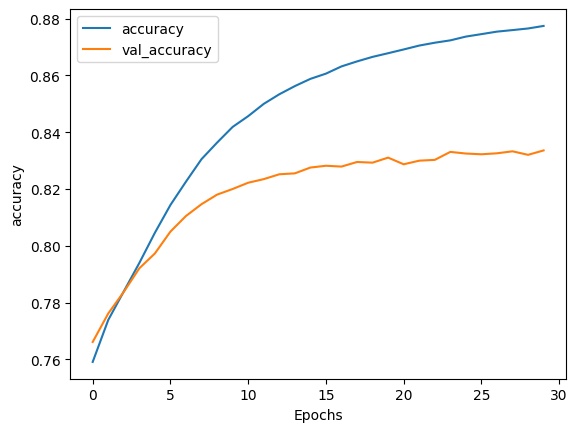

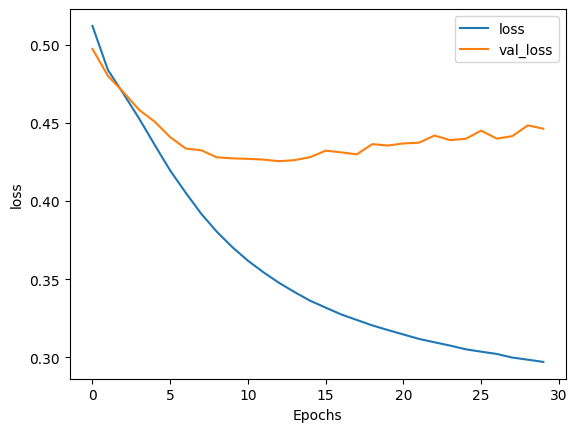

In [17]:
# Plot the accuracy and results 
plot_graphs(gru_model_1, "accuracy")
plot_graphs(gru_model_1, "loss")

Comment:  This model gru_model_1 has high training accuracy of 87.7% and validation accuracy of 83.4%. It can pass the validation test that no overfitting issue can be identified. The total training time is approximate 1825 seconds (around 30 mins) for 30 epochs and 128 batch size.

## 2nd GRU model

In [18]:
# Hyperparameters
embedding_dim = 54 # each word will be represented by a dense vextor of specified size
gru_dim = 54 # num of units of GRU
dense_dim = 54 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [19]:
# Build the model
gru_model_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = "softmax")
])

# Set the training parameters
# Using categorical_crossentropy for classification of positive, netural, and negative sentiment
gru_model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
gru_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 54)            27000     
                                                                 
 bidirectional_1 (Bidirectio  (None, 108)              35640     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 54)                5886      
                                                                 
 dense_3 (Dense)             (None, 3)                 165       
                                                                 
Total params: 68,691
Trainable params: 68,691
Non-trainable params: 0
_________________________________________________________________


In [20]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
gru_model_2 = gru_model_2.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 43s 7ms/step - loss: 0.5147 - accuracy: 0.7585 - val_loss: 0.4952 - val_accuracy: 0.7681
Epoch 2/30
5654/5654 [==============================] - 41s 7ms/step - loss: 0.4867 - accuracy: 0.7721 - val_loss: 0.4831 - val_accuracy: 0.7754
Epoch 3/30
5654/5654 [==============================] - 41s 7ms/step - loss: 0.4718 - accuracy: 0.7818 - val_loss: 0.4732 - val_accuracy: 0.7820
Epoch 4/30
5654/5654 [==============================] - 41s 7ms/step - loss: 0.4579 - accuracy: 0.7905 - val_loss: 0.4629 - val_accuracy: 0.7888
Epoch 5/30
5654/5654 [==============================] - 41s 7ms/step - loss: 0.4439 - accuracy: 0.7994 - val_loss: 0.4555 - val_accuracy: 0.7937
Epoch 6/30
5654/5654 [==============================] - 41s 7ms/step - loss: 0.4302 - accuracy: 0.8080 - val_loss: 0.4486 - val_accuracy: 0.7994
Epoch 7/30
5654/5654 [==============================] - 41s 7ms/step - loss: 0.4173 - accuracy: 0.8160 - val_loss: 0.4414 - val_ac

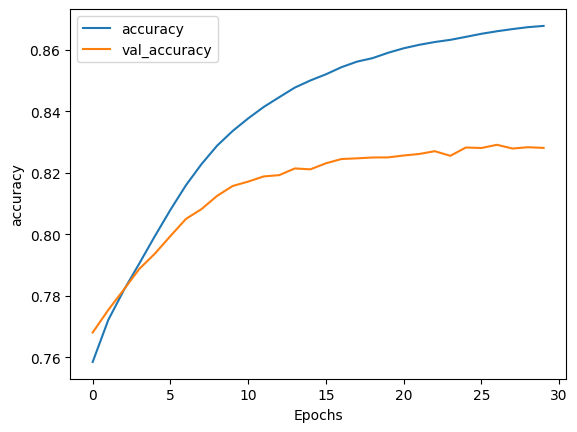

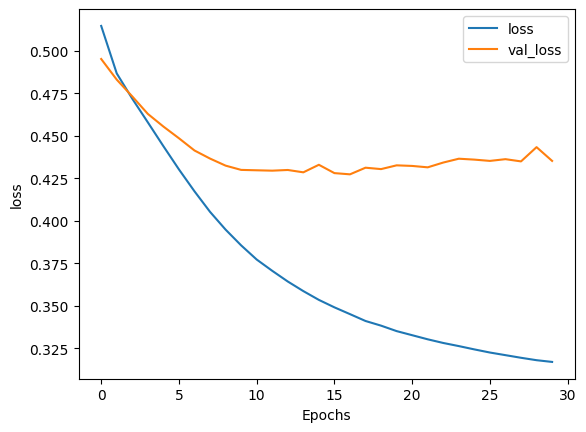

In [21]:
# Plot the accuracy and results 
plot_graphs(gru_model_2, "accuracy")
plot_graphs(gru_model_2, "loss")

Comment: This model gru_model_2 has high training accuracy of 86.8% and validation accuracy of 82.8%. It can pass the validation test that no overfitting issue can be identified. The total training time is approximate 1223 seconds (around 20 mins) for 30 epochs and 128 batch size.

## 3rd GRU model

In [34]:
# Hyperparameters
embedding_dim = 44 # each word will be represented by a dense vextor of specified size
gru_dim = 44 # num of units of GRU
dense_dim = 44 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [23]:
# Build the model
gru_model_3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = "softmax")
])

# Set the training parameters
# Using categorical_crossentropy for classification of positive, netural, and negative sentiment
gru_model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
gru_model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 10, 44)            22000     
                                                                 
 bidirectional_2 (Bidirectio  (None, 88)               23760     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 44)                3916      
                                                                 
 dense_5 (Dense)             (None, 3)                 135       
                                                                 
Total params: 49,811
Trainable params: 49,811
Non-trainable params: 0
_________________________________________________________________


In [24]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
gru_model_3 = gru_model_3.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 35s 6ms/step - loss: 0.5166 - accuracy: 0.7579 - val_loss: 0.4986 - val_accuracy: 0.7649
Epoch 2/30
5654/5654 [==============================] - 33s 6ms/step - loss: 0.4886 - accuracy: 0.7718 - val_loss: 0.4863 - val_accuracy: 0.7728
Epoch 3/30
5654/5654 [==============================] - 33s 6ms/step - loss: 0.4757 - accuracy: 0.7798 - val_loss: 0.4760 - val_accuracy: 0.7799
Epoch 4/30
5654/5654 [==============================] - 33s 6ms/step - loss: 0.4640 - accuracy: 0.7873 - val_loss: 0.4682 - val_accuracy: 0.7857
Epoch 5/30
5654/5654 [==============================] - 33s 6ms/step - loss: 0.4525 - accuracy: 0.7942 - val_loss: 0.4615 - val_accuracy: 0.7899
Epoch 6/30
5654/5654 [==============================] - 33s 6ms/step - loss: 0.4411 - accuracy: 0.8018 - val_loss: 0.4562 - val_accuracy: 0.7943
Epoch 7/30
5654/5654 [==============================] - 33s 6ms/step - loss: 0.4302 - accuracy: 0.8083 - val_loss: 0.4495 - val_ac

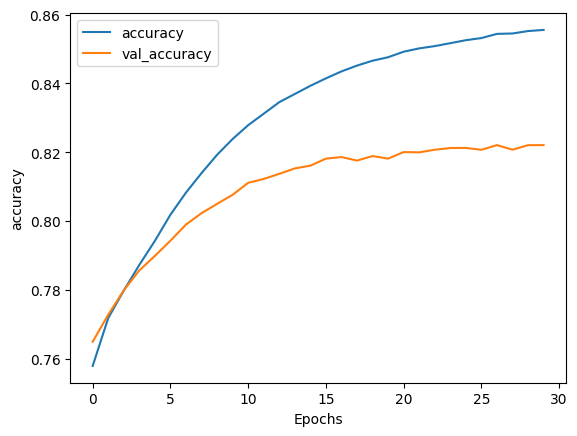

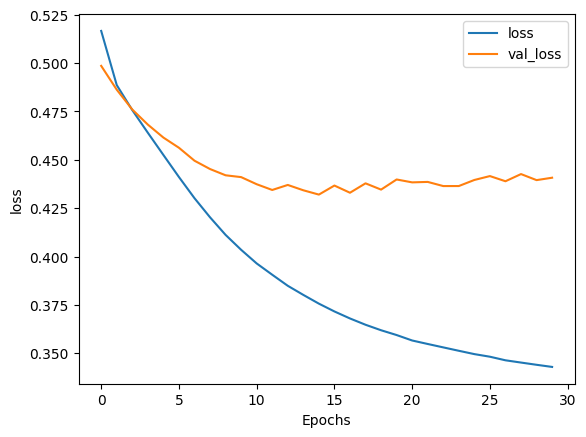

In [25]:
# Plot the accuracy and results 
plot_graphs(gru_model_3, "accuracy")
plot_graphs(gru_model_3, "loss")

Comment: This model gru_model_3 has high training accuracy of 85.6% and validation accuracy of 82.2%. It can pass the validation test that no overfitting issue can be identified. The total training time is approximate 992 seconds (around 16 mins) for 30 epochs and 128 batch size.

## 4th GRU model

In [26]:
# Hyperparameters
embedding_dim = 34 # each word will be represented by a dense vextor of specified size
gru_dim = 34 # num of units of GRU
dense_dim = 34 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [27]:
# Build the model
gru_model_4 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = "softmax")
])

# Set the training parameters
# Using categorical_crossentropy for classification of positive, netural, and negative sentiment
gru_model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
gru_model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 10, 34)            17000     
                                                                 
 bidirectional_3 (Bidirectio  (None, 68)               14280     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 34)                2346      
                                                                 
 dense_7 (Dense)             (None, 3)                 105       
                                                                 
Total params: 33,731
Trainable params: 33,731
Non-trainable params: 0
_________________________________________________________________


In [28]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
gru_model_4 = gru_model_4.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 32s 5ms/step - loss: 0.5192 - accuracy: 0.7568 - val_loss: 0.4981 - val_accuracy: 0.7650
Epoch 2/30
5654/5654 [==============================] - 29s 5ms/step - loss: 0.4907 - accuracy: 0.7699 - val_loss: 0.4881 - val_accuracy: 0.7722
Epoch 3/30
5654/5654 [==============================] - 29s 5ms/step - loss: 0.4800 - accuracy: 0.7766 - val_loss: 0.4841 - val_accuracy: 0.7739
Epoch 4/30
5654/5654 [==============================] - 29s 5ms/step - loss: 0.4706 - accuracy: 0.7826 - val_loss: 0.4756 - val_accuracy: 0.7806
Epoch 5/30
5654/5654 [==============================] - 29s 5ms/step - loss: 0.4612 - accuracy: 0.7888 - val_loss: 0.4686 - val_accuracy: 0.7849
Epoch 6/30
5654/5654 [==============================] - 29s 5ms/step - loss: 0.4520 - accuracy: 0.7953 - val_loss: 0.4629 - val_accuracy: 0.7902
Epoch 7/30
5654/5654 [==============================] - 29s 5ms/step - loss: 0.4435 - accuracy: 0.8011 - val_loss: 0.4568 - val_ac

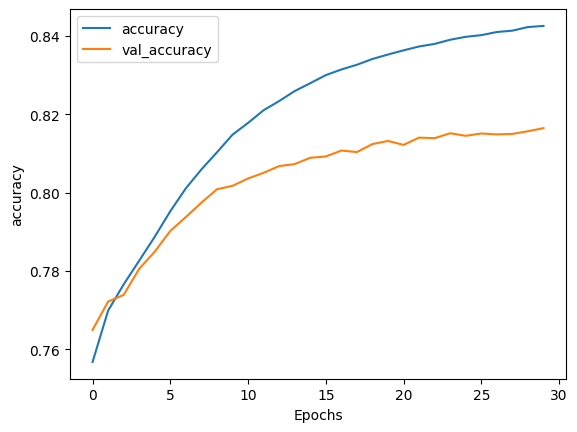

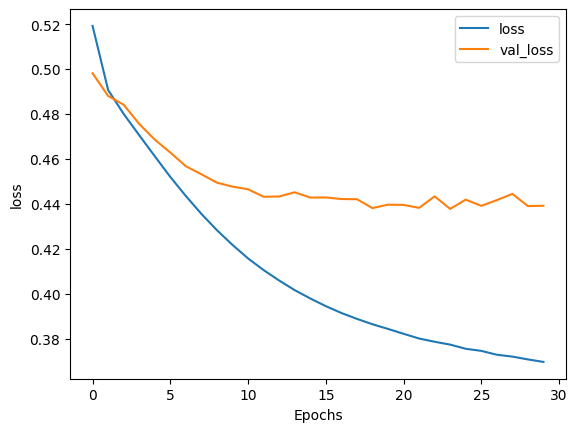

In [29]:
# Plot the accuracy and results 
plot_graphs(gru_model_4, "accuracy")
plot_graphs(gru_model_4, "loss")

Comment: This model gru_model_4 has high training accuracy of 84.3% and validation accuracy of 81.6%. It can pass the validation test that no overfitting issue can be identified. The total training time is approximate 874 seconds (around 14 mins) for 30 epochs and 128 batch size.

## 5th GRU model

In [30]:
# Hyperparameters
embedding_dim = 24 # each word will be represented by a dense vextor of specified size
gru_dim = 24 # num of units of GRU
dense_dim = 24 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [31]:
# Build the model
gru_model_5 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = "softmax")
])

# Set the training parameters
# Using categorical_crossentropy for classification of positive, netural, and negative sentiment
gru_model_5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
gru_model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 10, 24)            12000     
                                                                 
 bidirectional_4 (Bidirectio  (None, 48)               7200      
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 24)                1176      
                                                                 
 dense_9 (Dense)             (None, 3)                 75        
                                                                 
Total params: 20,451
Trainable params: 20,451
Non-trainable params: 0
_________________________________________________________________


In [32]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
gru_model_5 = gru_model_5.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 28s 5ms/step - loss: 0.5232 - accuracy: 0.7553 - val_loss: 0.5052 - val_accuracy: 0.7618
Epoch 2/30
5654/5654 [==============================] - 26s 5ms/step - loss: 0.4966 - accuracy: 0.7663 - val_loss: 0.4936 - val_accuracy: 0.7686
Epoch 3/30
5654/5654 [==============================] - 26s 5ms/step - loss: 0.4875 - accuracy: 0.7718 - val_loss: 0.4876 - val_accuracy: 0.7723
Epoch 4/30
5654/5654 [==============================] - 26s 5ms/step - loss: 0.4798 - accuracy: 0.7768 - val_loss: 0.4839 - val_accuracy: 0.7742
Epoch 5/30
5654/5654 [==============================] - 26s 5ms/step - loss: 0.4725 - accuracy: 0.7818 - val_loss: 0.4769 - val_accuracy: 0.7797
Epoch 6/30
5654/5654 [==============================] - 26s 5ms/step - loss: 0.4655 - accuracy: 0.7863 - val_loss: 0.4734 - val_accuracy: 0.7816
Epoch 7/30
5654/5654 [==============================] - 26s 5ms/step - loss: 0.4595 - accuracy: 0.7903 - val_loss: 0.4711 - val_ac

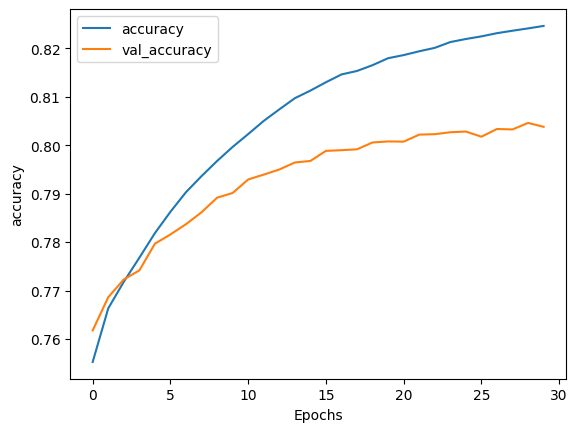

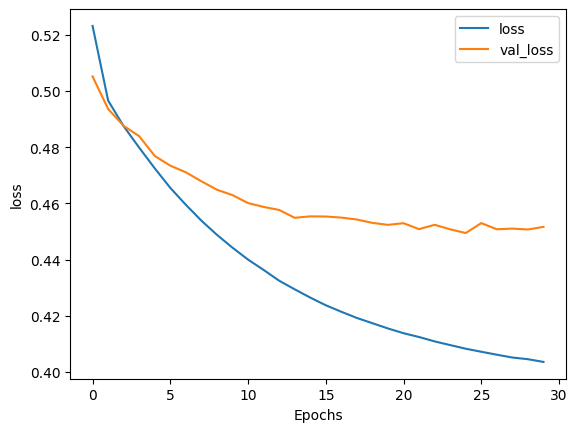

In [33]:
# Plot the accuracy and results 
plot_graphs(gru_model_5, "accuracy")
plot_graphs(gru_model_5, "loss")

Comment: This model gru_model_3 has high training accuracy of 82.5% and validation accuracy of 80.4%. It can pass the validation test that no overfitting issue can be identified. The total training time is approximate 790 seconds (around 13 mins) for 30 epochs and 128 batch size.

# Model Optimization

Overall, the best of the above 5 GRU models is gru_model_2 with high training accuracy of and validation accuracy. And the training time is reasonable. 

1. training accuracy: 86.8% 
2. validation accuracy: 82.8%. 
3. validation test: PASS
4. total training time: 1223 seconds (around 20 mins)

Next, it will adjust gru_model_2 model's hyperparameter to find any possible replacement model with best performance and lowest training cost. First, it will adjust the gru_dim units.

## GRU 2.1 model

In [35]:
# Hyperparameters
embedding_dim = 54 # each word will be represented by a dense vextor of specified size
gru_dim = 64 # num of units of GRU
dense_dim = 54 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [36]:
# Build the model
gru_model_2_1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = "softmax")
])

# Set the training parameters
# Using categorical_crossentropy for classification of positive, netural, and negative sentiment
gru_model_2_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
gru_model_2_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 10, 54)            27000     
                                                                 
 bidirectional_5 (Bidirectio  (None, 128)              46080     
 nal)                                                            
                                                                 
 dense_10 (Dense)            (None, 54)                6966      
                                                                 
 dense_11 (Dense)            (None, 3)                 165       
                                                                 
Total params: 80,211
Trainable params: 80,211
Non-trainable params: 0
_________________________________________________________________


In [37]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
gru_model_2_1 = gru_model_2_1.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 48s 8ms/step - loss: 0.5131 - accuracy: 0.7590 - val_loss: 0.4987 - val_accuracy: 0.7653
Epoch 2/30
5654/5654 [==============================] - 45s 8ms/step - loss: 0.4858 - accuracy: 0.7729 - val_loss: 0.4811 - val_accuracy: 0.7755
Epoch 3/30
5654/5654 [==============================] - 45s 8ms/step - loss: 0.4705 - accuracy: 0.7825 - val_loss: 0.4717 - val_accuracy: 0.7823
Epoch 4/30
5654/5654 [==============================] - 46s 8ms/step - loss: 0.4560 - accuracy: 0.7914 - val_loss: 0.4608 - val_accuracy: 0.7892
Epoch 5/30
5654/5654 [==============================] - 46s 8ms/step - loss: 0.4409 - accuracy: 0.8003 - val_loss: 0.4522 - val_accuracy: 0.7964
Epoch 6/30
5654/5654 [==============================] - 45s 8ms/step - loss: 0.4261 - accuracy: 0.8097 - val_loss: 0.4442 - val_accuracy: 0.8017
Epoch 7/30
5654/5654 [==============================] - 46s 8ms/step - loss: 0.4124 - accuracy: 0.8178 - val_loss: 0.4399 - val_ac

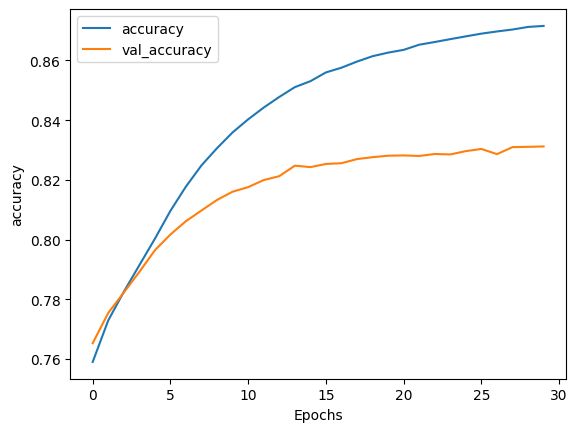

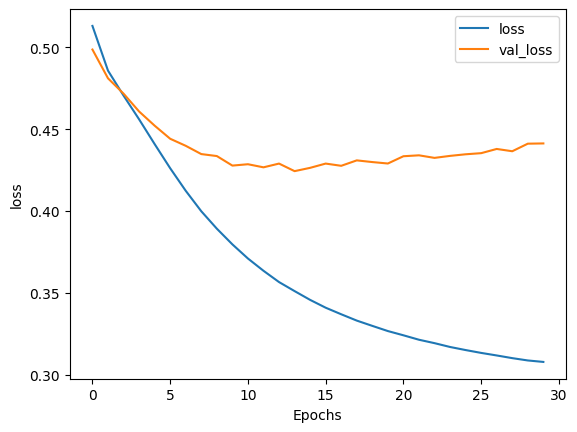

In [38]:
# Plot the accuracy and results 
plot_graphs(gru_model_2_1, "accuracy")
plot_graphs(gru_model_2_1, "loss")

Comment: This model gru_model_2_1 has high training accuracy of 87.2% and validation accuracy of 83.1%. It can pass the validation test that no overfitting issue can be identified. The total training time is approximate 1402 seconds (around 23 mins) for 30 epochs and 128 batch size.

## GRU 2.2 model

In [40]:
# Hyperparameters
embedding_dim = 54 # each word will be represented by a dense vextor of specified size
gru_dim = 34 # num of units of GRU
dense_dim = 54 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [41]:
# Build the model
gru_model_2_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = "softmax")
])

# Set the training parameters
# Using categorical_crossentropy for classification of positive, netural, and negative sentiment
gru_model_2_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
gru_model_2_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 10, 54)            27000     
                                                                 
 bidirectional_6 (Bidirectio  (None, 68)               18360     
 nal)                                                            
                                                                 
 dense_12 (Dense)            (None, 54)                3726      
                                                                 
 dense_13 (Dense)            (None, 3)                 165       
                                                                 
Total params: 49,251
Trainable params: 49,251
Non-trainable params: 0
_________________________________________________________________


In [42]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
gru_model_2_2 = gru_model_2_2.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 35s 6ms/step - loss: 0.5143 - accuracy: 0.7586 - val_loss: 0.4956 - val_accuracy: 0.7671
Epoch 2/30
5654/5654 [==============================] - 32s 6ms/step - loss: 0.4873 - accuracy: 0.7722 - val_loss: 0.4831 - val_accuracy: 0.7751
Epoch 3/30
5654/5654 [==============================] - 33s 6ms/step - loss: 0.4749 - accuracy: 0.7803 - val_loss: 0.4766 - val_accuracy: 0.7795
Epoch 4/30
5654/5654 [==============================] - 32s 6ms/step - loss: 0.4638 - accuracy: 0.7869 - val_loss: 0.4673 - val_accuracy: 0.7857
Epoch 5/30
5654/5654 [==============================] - 33s 6ms/step - loss: 0.4524 - accuracy: 0.7946 - val_loss: 0.4630 - val_accuracy: 0.7885
Epoch 6/30
5654/5654 [==============================] - 33s 6ms/step - loss: 0.4412 - accuracy: 0.8014 - val_loss: 0.4545 - val_accuracy: 0.7951
Epoch 7/30
5654/5654 [==============================] - 33s 6ms/step - loss: 0.4308 - accuracy: 0.8078 - val_loss: 0.4486 - val_ac

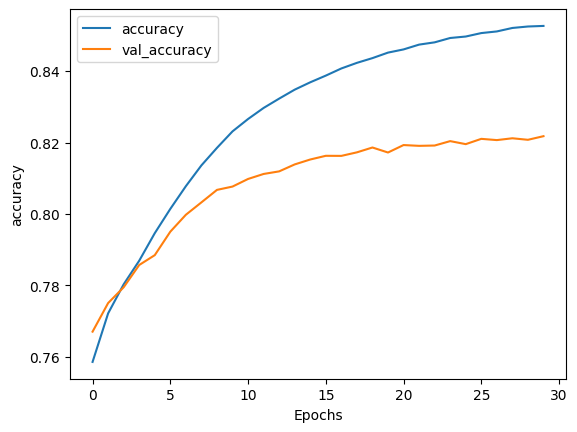

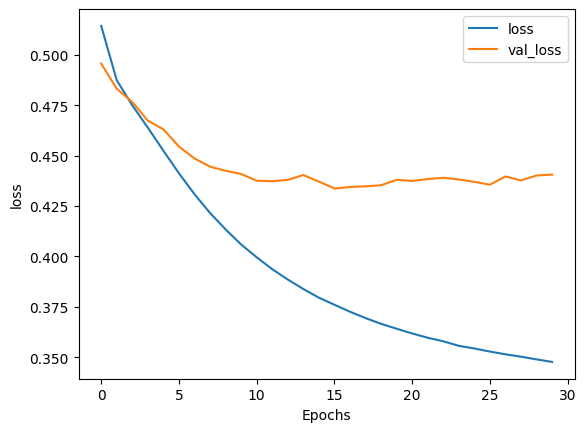

In [43]:
# Plot the accuracy and results 
plot_graphs(gru_model_2_2, "accuracy")
plot_graphs(gru_model_2_2, "loss")

Comment: This model gru_model_2_2 has high training accuracy of 85.3% and validation accuracy of 82.2%. It can pass the validation test that no overfitting issue can be identified. The total training time is approximate 980 seconds (around 16 mins) for 30 epochs and 128 batch size.

## GRU 2.3 model

In [44]:
# Hyperparameters
embedding_dim = 54 # each word will be represented by a dense vextor of specified size
gru_dim = 24 # num of units of GRU
dense_dim = 54 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [45]:
# Build the model
gru_model_2_3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = "softmax")
])

# Set the training parameters
# Using categorical_crossentropy for classification of positive, netural, and negative sentiment
gru_model_2_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
gru_model_2_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 10, 54)            27000     
                                                                 
 bidirectional_7 (Bidirectio  (None, 48)               11520     
 nal)                                                            
                                                                 
 dense_14 (Dense)            (None, 54)                2646      
                                                                 
 dense_15 (Dense)            (None, 3)                 165       
                                                                 
Total params: 41,331
Trainable params: 41,331
Non-trainable params: 0
_________________________________________________________________


In [46]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
gru_model_2_3 = gru_model_2_3.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 31s 5ms/step - loss: 0.5148 - accuracy: 0.7587 - val_loss: 0.4970 - val_accuracy: 0.7665
Epoch 2/30
5654/5654 [==============================] - 29s 5ms/step - loss: 0.4883 - accuracy: 0.7713 - val_loss: 0.4852 - val_accuracy: 0.7726
Epoch 3/30
5654/5654 [==============================] - 29s 5ms/step - loss: 0.4762 - accuracy: 0.7791 - val_loss: 0.4779 - val_accuracy: 0.7779
Epoch 4/30
5654/5654 [==============================] - 29s 5ms/step - loss: 0.4658 - accuracy: 0.7854 - val_loss: 0.4703 - val_accuracy: 0.7826
Epoch 5/30
5654/5654 [==============================] - 29s 5ms/step - loss: 0.4561 - accuracy: 0.7916 - val_loss: 0.4647 - val_accuracy: 0.7878
Epoch 6/30
5654/5654 [==============================] - 29s 5ms/step - loss: 0.4469 - accuracy: 0.7974 - val_loss: 0.4599 - val_accuracy: 0.7897
Epoch 7/30
5654/5654 [==============================] - 30s 5ms/step - loss: 0.4388 - accuracy: 0.8020 - val_loss: 0.4564 - val_ac

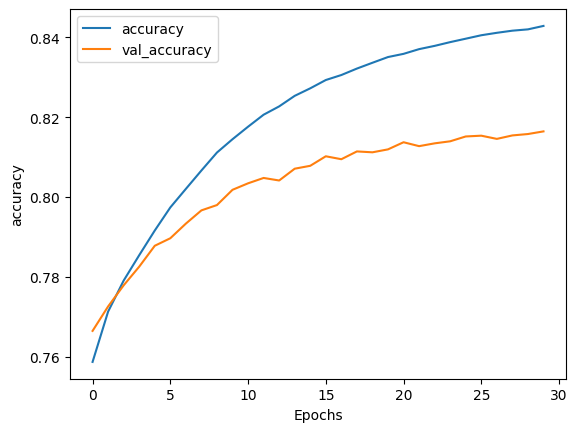

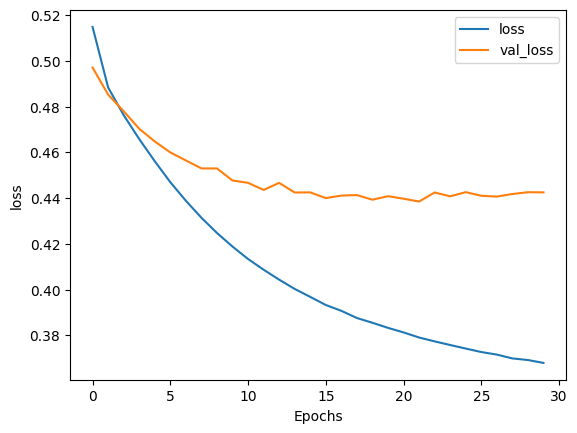

In [47]:
# Plot the accuracy and results 
plot_graphs(gru_model_2_3, "accuracy")
plot_graphs(gru_model_2_3, "loss")

Comment: This model gru_model_2_3 has high training accuracy of 84.3% and validation accuracy of 81.7%. It can pass the validation test that no overfitting issue can be identified. The total training time is approximate 872 seconds (around 14 mins) for 30 epochs and 128 batch size.

Next, it will adjust the embedding_dim hyperparameter.

## GRU 2.4 model

In [49]:
# Hyperparameters
embedding_dim = 64 # each word will be represented by a dense vextor of specified size
gru_dim = 54 # num of units of GRU
dense_dim = 54 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [50]:
# Build the model
gru_model_2_4 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = "softmax")
])

# Set the training parameters
# Using categorical_crossentropy for classification of positive, netural, and negative sentiment
gru_model_2_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
gru_model_2_4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 10, 64)            32000     
                                                                 
 bidirectional_8 (Bidirectio  (None, 108)              38880     
 nal)                                                            
                                                                 
 dense_16 (Dense)            (None, 54)                5886      
                                                                 
 dense_17 (Dense)            (None, 3)                 165       
                                                                 
Total params: 76,931
Trainable params: 76,931
Non-trainable params: 0
_________________________________________________________________


In [51]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
gru_model_2_4 = gru_model_2_4.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 47s 8ms/step - loss: 0.5137 - accuracy: 0.7585 - val_loss: 0.4969 - val_accuracy: 0.7659
Epoch 2/30
5654/5654 [==============================] - 43s 8ms/step - loss: 0.4867 - accuracy: 0.7718 - val_loss: 0.4828 - val_accuracy: 0.7748
Epoch 3/30
5654/5654 [==============================] - 43s 8ms/step - loss: 0.4719 - accuracy: 0.7818 - val_loss: 0.4731 - val_accuracy: 0.7811
Epoch 4/30
5654/5654 [==============================] - 43s 8ms/step - loss: 0.4575 - accuracy: 0.7908 - val_loss: 0.4632 - val_accuracy: 0.7880
Epoch 5/30
5654/5654 [==============================] - 43s 8ms/step - loss: 0.4424 - accuracy: 0.8000 - val_loss: 0.4541 - val_accuracy: 0.7954
Epoch 6/30
5654/5654 [==============================] - 43s 8ms/step - loss: 0.4276 - accuracy: 0.8092 - val_loss: 0.4465 - val_accuracy: 0.8007
Epoch 7/30
5654/5654 [==============================] - 43s 8ms/step - loss: 0.4147 - accuracy: 0.8165 - val_loss: 0.4408 - val_ac

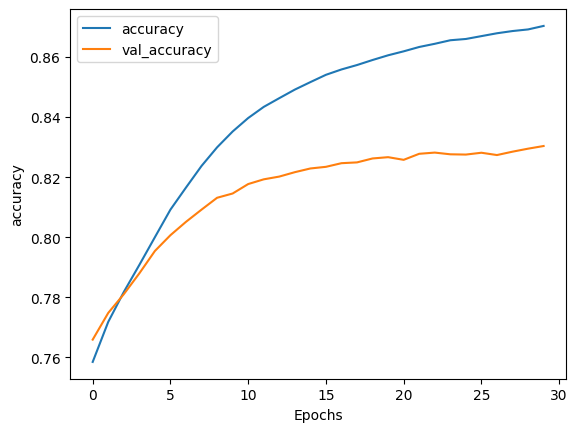

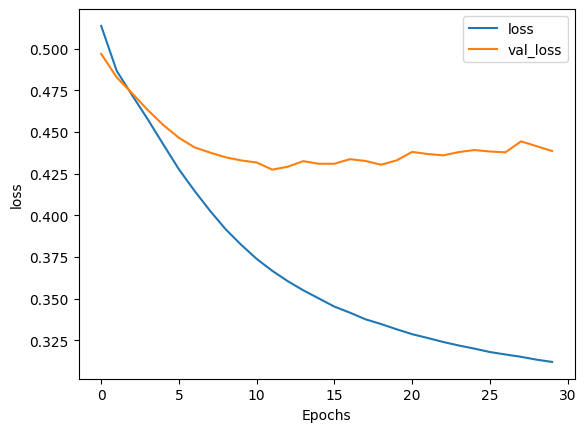

In [52]:
# Plot the accuracy and results 
plot_graphs(gru_model_2_4, "accuracy")
plot_graphs(gru_model_2_4, "loss")

Comment: This model gru_model_2_4 has high training accuracy of 87.0% and validation accuracy of 83.0%. It can pass the validation test that no overfitting issue can be identified. The total training time is approximate 1325 seconds (around 22 mins) for 30 epochs and 128 batch size.

## GRU 2.5 model

In [53]:
# Hyperparameters
embedding_dim = 44 # each word will be represented by a dense vextor of specified size
gru_dim = 54 # num of units of GRU
dense_dim = 54 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [54]:
# Build the model
gru_model_2_5 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = "softmax")
])

# Set the training parameters
# Using categorical_crossentropy for classification of positive, netural, and negative sentiment
gru_model_2_5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
gru_model_2_5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 10, 44)            22000     
                                                                 
 bidirectional_9 (Bidirectio  (None, 108)              32400     
 nal)                                                            
                                                                 
 dense_18 (Dense)            (None, 54)                5886      
                                                                 
 dense_19 (Dense)            (None, 3)                 165       
                                                                 
Total params: 60,451
Trainable params: 60,451
Non-trainable params: 0
_________________________________________________________________


In [55]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
gru_model_2_5 = gru_model_2_5.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 45s 8ms/step - loss: 0.5149 - accuracy: 0.7580 - val_loss: 0.4982 - val_accuracy: 0.7665
Epoch 2/30
5654/5654 [==============================] - 41s 7ms/step - loss: 0.4878 - accuracy: 0.7717 - val_loss: 0.4842 - val_accuracy: 0.7738
Epoch 3/30
5654/5654 [==============================] - 41s 7ms/step - loss: 0.4745 - accuracy: 0.7798 - val_loss: 0.4747 - val_accuracy: 0.7803
Epoch 4/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4618 - accuracy: 0.7877 - val_loss: 0.4656 - val_accuracy: 0.7859
Epoch 5/30
5654/5654 [==============================] - 41s 7ms/step - loss: 0.4484 - accuracy: 0.7965 - val_loss: 0.4578 - val_accuracy: 0.7917
Epoch 6/30
5654/5654 [==============================] - 41s 7ms/step - loss: 0.4355 - accuracy: 0.8036 - val_loss: 0.4510 - val_accuracy: 0.7970
Epoch 7/30
5654/5654 [==============================] - 41s 7ms/step - loss: 0.4236 - accuracy: 0.8108 - val_loss: 0.4454 - val_ac

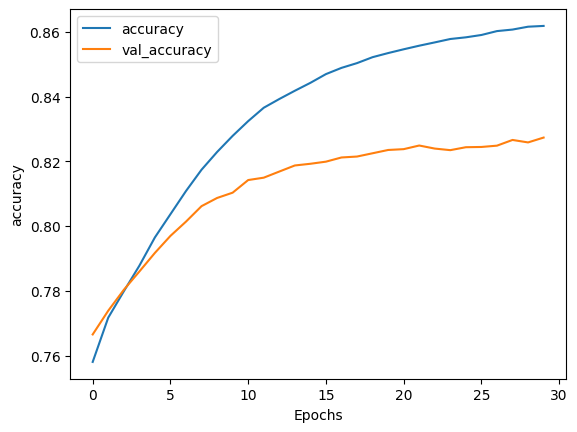

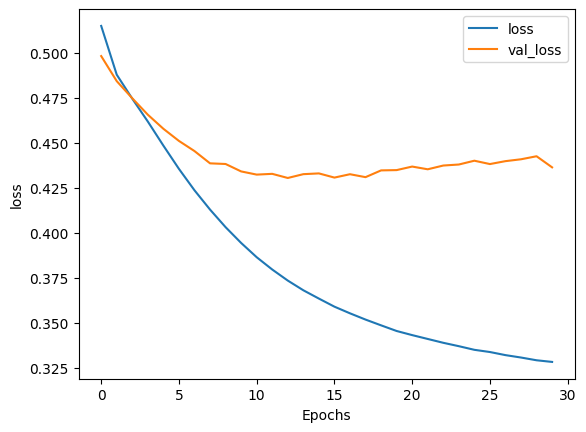

In [56]:
# Plot the accuracy and results 
plot_graphs(gru_model_2_5, "accuracy")
plot_graphs(gru_model_2_5, "loss")

Comment: This model gru_model_2_5 has high training accuracy of 86.2% and validation accuracy of 82.7%. It can pass the validation test that no overfitting issue can be identified. The total training time is approximate 1245 seconds (around 20 mins) for 30 epochs and 128 batch size.

## GRU 2.6 model

In [57]:
# Hyperparameters
embedding_dim = 34 # each word will be represented by a dense vextor of specified size
gru_dim = 54 # num of units of GRU
dense_dim = 54 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [58]:
# Build the model
gru_model_2_6 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = "softmax")
])

# Set the training parameters
# Using categorical_crossentropy for classification of positive, netural, and negative sentiment
gru_model_2_6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
gru_model_2_6.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 10, 34)            17000     
                                                                 
 bidirectional_10 (Bidirecti  (None, 108)              29160     
 onal)                                                           
                                                                 
 dense_20 (Dense)            (None, 54)                5886      
                                                                 
 dense_21 (Dense)            (None, 3)                 165       
                                                                 
Total params: 52,211
Trainable params: 52,211
Non-trainable params: 0
_________________________________________________________________


In [59]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
gru_model_2_6 = gru_model_2_6.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 43s 7ms/step - loss: 0.5165 - accuracy: 0.7567 - val_loss: 0.5042 - val_accuracy: 0.7631
Epoch 2/30
5654/5654 [==============================] - 39s 7ms/step - loss: 0.4916 - accuracy: 0.7689 - val_loss: 0.4884 - val_accuracy: 0.7703
Epoch 3/30
5654/5654 [==============================] - 39s 7ms/step - loss: 0.4798 - accuracy: 0.7759 - val_loss: 0.4803 - val_accuracy: 0.7763
Epoch 4/30
5654/5654 [==============================] - 40s 7ms/step - loss: 0.4688 - accuracy: 0.7832 - val_loss: 0.4715 - val_accuracy: 0.7822
Epoch 5/30
5654/5654 [==============================] - 39s 7ms/step - loss: 0.4571 - accuracy: 0.7905 - val_loss: 0.4647 - val_accuracy: 0.7875
Epoch 6/30
5654/5654 [==============================] - 41s 7ms/step - loss: 0.4453 - accuracy: 0.7982 - val_loss: 0.4571 - val_accuracy: 0.7915
Epoch 7/30
5654/5654 [==============================] - 40s 7ms/step - loss: 0.4336 - accuracy: 0.8051 - val_loss: 0.4510 - val_ac

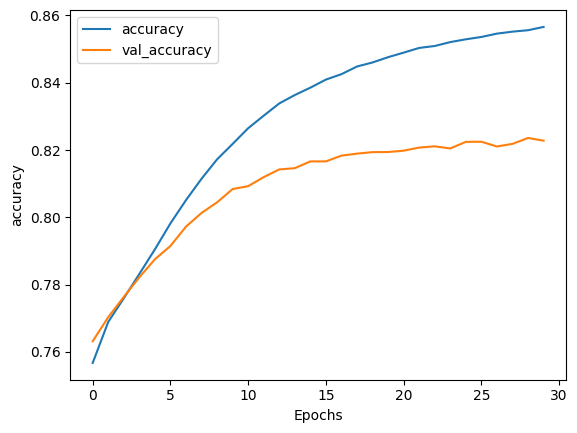

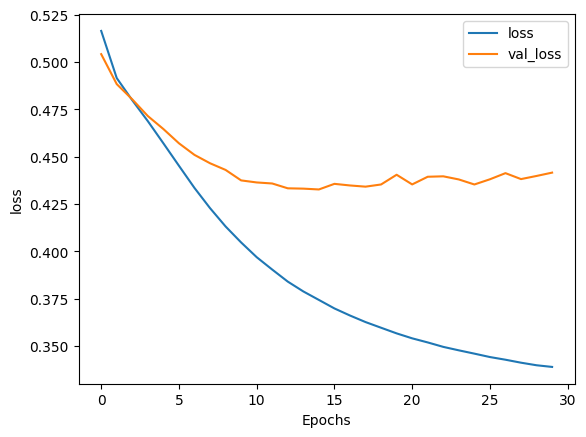

In [60]:
# Plot the accuracy and results 
plot_graphs(gru_model_2_6, "accuracy")
plot_graphs(gru_model_2_6, "loss")

Comment: This model gru_model_2_6 has high training accuracy of 85.7% and validation accuracy of 82.3%. It can pass the validation test that no overfitting issue can be identified. The total training time is approximate 1202 seconds (around 20 mins) for 30 epochs and 128 batch size.

## GRU 2.7 model

In [61]:
# Hyperparameters
embedding_dim = 24 # each word will be represented by a dense vextor of specified size
gru_dim = 54 # num of units of GRU
dense_dim = 54 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [62]:
# Build the model
gru_model_2_7 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = "softmax")
])

# Set the training parameters
# Using categorical_crossentropy for classification of positive, netural, and negative sentiment
gru_model_2_7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
gru_model_2_7.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 10, 24)            12000     
                                                                 
 bidirectional_11 (Bidirecti  (None, 108)              25920     
 onal)                                                           
                                                                 
 dense_22 (Dense)            (None, 54)                5886      
                                                                 
 dense_23 (Dense)            (None, 3)                 165       
                                                                 
Total params: 43,971
Trainable params: 43,971
Non-trainable params: 0
_________________________________________________________________


In [63]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
gru_model_2_7 = gru_model_2_7.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 41s 7ms/step - loss: 0.5188 - accuracy: 0.7565 - val_loss: 0.5009 - val_accuracy: 0.7636
Epoch 2/30
5654/5654 [==============================] - 38s 7ms/step - loss: 0.4927 - accuracy: 0.7686 - val_loss: 0.4920 - val_accuracy: 0.7702
Epoch 3/30
5654/5654 [==============================] - 38s 7ms/step - loss: 0.4821 - accuracy: 0.7749 - val_loss: 0.4832 - val_accuracy: 0.7760
Epoch 4/30
5654/5654 [==============================] - 39s 7ms/step - loss: 0.4721 - accuracy: 0.7814 - val_loss: 0.4743 - val_accuracy: 0.7798
Epoch 5/30
5654/5654 [==============================] - 39s 7ms/step - loss: 0.4622 - accuracy: 0.7879 - val_loss: 0.4677 - val_accuracy: 0.7854
Epoch 6/30
5654/5654 [==============================] - 39s 7ms/step - loss: 0.4516 - accuracy: 0.7946 - val_loss: 0.4636 - val_accuracy: 0.7892
Epoch 7/30
5654/5654 [==============================] - 39s 7ms/step - loss: 0.4413 - accuracy: 0.8010 - val_loss: 0.4589 - val_ac

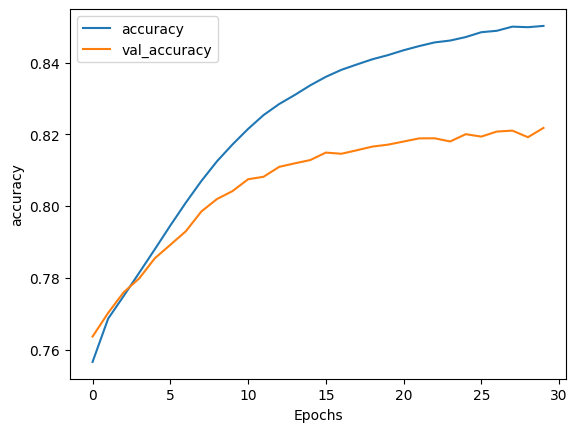

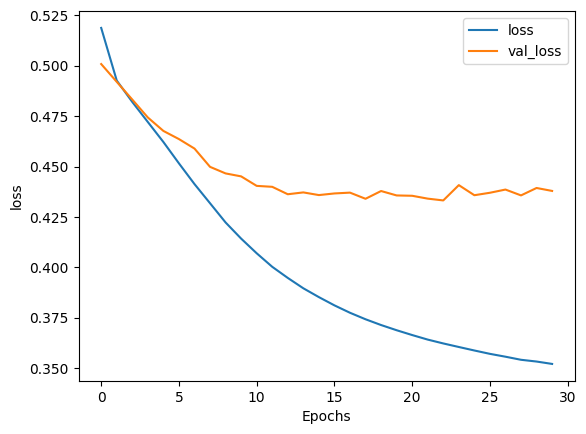

In [64]:
# Plot the accuracy and results 
plot_graphs(gru_model_2_7, "accuracy")
plot_graphs(gru_model_2_7, "loss")

Comment: This model gru_model_2_7 has high training accuracy of 85% and validation accuracy of 82.2%. It can pass the validation test that no overfitting issue can be identified. The total training time is approximate 1154 seconds (around 19 mins) for 30 epochs and 128 batch size.

Next, it will adjust the dense layer hyperparameter.

## GRU 2.8 model

In [81]:
# Hyperparameters
embedding_dim = 54 # each word will be represented by a dense vextor of specified size
gru_dim = 54 # num of units of GRU
dense_dim = 64 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [82]:
# Build the model
gru_model_2_8 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = "softmax")
])

# Set the training parameters
# Using categorical_crossentropy for classification of positive, netural, and negative sentiment
gru_model_2_8.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
gru_model_2_8.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 10, 54)            27000     
                                                                 
 bidirectional_16 (Bidirecti  (None, 108)              35640     
 onal)                                                           
                                                                 
 dense_32 (Dense)            (None, 64)                6976      
                                                                 
 dense_33 (Dense)            (None, 3)                 195       
                                                                 
Total params: 69,811
Trainable params: 69,811
Non-trainable params: 0
_________________________________________________________________


In [83]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
gru_model_2_8 = gru_model_2_8.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 46s 8ms/step - loss: 0.5137 - accuracy: 0.7591 - val_loss: 0.4956 - val_accuracy: 0.7658
Epoch 2/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4857 - accuracy: 0.7729 - val_loss: 0.4841 - val_accuracy: 0.7746
Epoch 3/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4708 - accuracy: 0.7817 - val_loss: 0.4716 - val_accuracy: 0.7819
Epoch 4/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4567 - accuracy: 0.7912 - val_loss: 0.4618 - val_accuracy: 0.7896
Epoch 5/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4430 - accuracy: 0.7998 - val_loss: 0.4528 - val_accuracy: 0.7960
Epoch 6/30
5654/5654 [==============================] - 41s 7ms/step - loss: 0.4291 - accuracy: 0.8085 - val_loss: 0.4461 - val_accuracy: 0.8014
Epoch 7/30
5654/5654 [==============================] - 41s 7ms/step - loss: 0.4160 - accuracy: 0.8160 - val_loss: 0.4397 - val_ac

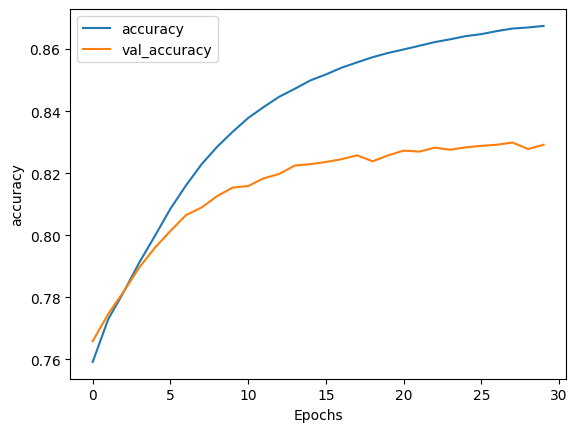

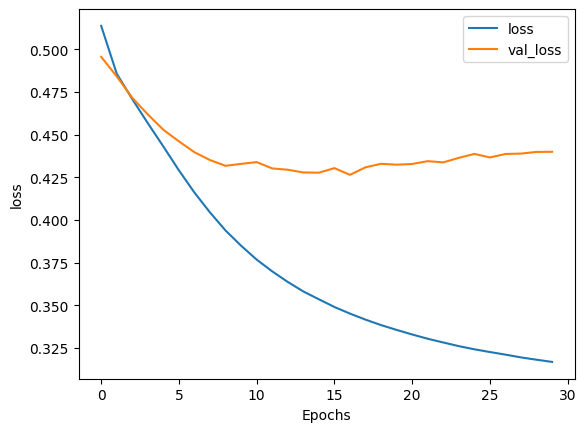

In [84]:
# Plot the accuracy and results 
plot_graphs(gru_model_2_8, "accuracy")
plot_graphs(gru_model_2_8, "loss")

Comment: This model gru_model_2_8 has high training accuracy of 86.8% and validation accuracy of 83%. It can pass the validation test that no overfitting issue can be identified. The total training time is approximate 1482 seconds (around 24 mins) for 30 epochs and 128 batch size.

## GRU 2.9 model

In [85]:
# Hyperparameters
embedding_dim = 54 # each word will be represented by a dense vextor of specified size
gru_dim = 54 # num of units of GRU
dense_dim = 44 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [86]:
# Build the model
gru_model_2_9 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = "softmax")
])

# Set the training parameters
# Using categorical_crossentropy for classification of positive, netural, and negative sentiment
gru_model_2_9.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
gru_model_2_9.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 10, 54)            27000     
                                                                 
 bidirectional_17 (Bidirecti  (None, 108)              35640     
 onal)                                                           
                                                                 
 dense_34 (Dense)            (None, 44)                4796      
                                                                 
 dense_35 (Dense)            (None, 3)                 135       
                                                                 
Total params: 67,571
Trainable params: 67,571
Non-trainable params: 0
_________________________________________________________________


In [87]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
gru_model_2_9 = gru_model_2_9.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 54s 9ms/step - loss: 0.5141 - accuracy: 0.7587 - val_loss: 0.4989 - val_accuracy: 0.7646
Epoch 2/30
5654/5654 [==============================] - 52s 9ms/step - loss: 0.4879 - accuracy: 0.7708 - val_loss: 0.4859 - val_accuracy: 0.7724
Epoch 3/30
5654/5654 [==============================] - 53s 9ms/step - loss: 0.4746 - accuracy: 0.7797 - val_loss: 0.4756 - val_accuracy: 0.7795
Epoch 4/30
5654/5654 [==============================] - 50s 9ms/step - loss: 0.4609 - accuracy: 0.7891 - val_loss: 0.4664 - val_accuracy: 0.7860
Epoch 5/30
5654/5654 [==============================] - 51s 9ms/step - loss: 0.4465 - accuracy: 0.7982 - val_loss: 0.4620 - val_accuracy: 0.7918
Epoch 6/30
5654/5654 [==============================] - 52s 9ms/step - loss: 0.4326 - accuracy: 0.8069 - val_loss: 0.4484 - val_accuracy: 0.7995
Epoch 7/30
5654/5654 [==============================] - 51s 9ms/step - loss: 0.4193 - accuracy: 0.8147 - val_loss: 0.4416 - val_ac

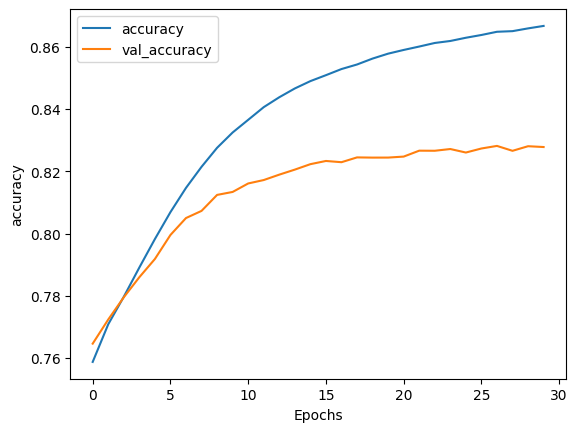

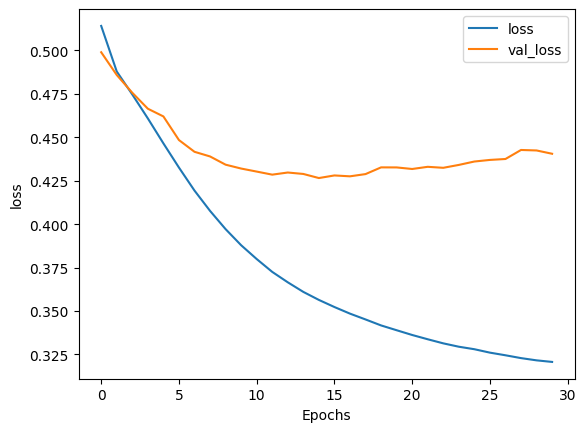

In [88]:
# Plot the accuracy and results 
plot_graphs(gru_model_2_9, "accuracy")
plot_graphs(gru_model_2_9, "loss")

Comment: This model gru_model_2_9 has high training accuracy of 86.7% and validation accuracy of 82.8%. It can pass the validation test that no overfitting issue can be identified. The total training time is approximate 1350 seconds (around 22 mins) for 30 epochs and 128 batch size.

## GRU 2.10 model

In [89]:
# Hyperparameters
embedding_dim = 54 # each word will be represented by a dense vextor of specified size
gru_dim = 54 # num of units of GRU
dense_dim = 34 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [90]:
# Build the model
gru_model_2_10 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = "softmax")
])

# Set the training parameters
# Using categorical_crossentropy for classification of positive, netural, and negative sentiment
gru_model_2_10.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
gru_model_2_10.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 10, 54)            27000     
                                                                 
 bidirectional_18 (Bidirecti  (None, 108)              35640     
 onal)                                                           
                                                                 
 dense_36 (Dense)            (None, 34)                3706      
                                                                 
 dense_37 (Dense)            (None, 3)                 105       
                                                                 
Total params: 66,451
Trainable params: 66,451
Non-trainable params: 0
_________________________________________________________________


In [91]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
gru_model_2_10 = gru_model_2_10.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.5149 - accuracy: 0.7581 - val_loss: 0.4967 - val_accuracy: 0.7660
Epoch 2/30
5654/5654 [==============================] - 40s 7ms/step - loss: 0.4867 - accuracy: 0.7727 - val_loss: 0.4858 - val_accuracy: 0.7738
Epoch 3/30
5654/5654 [==============================] - 40s 7ms/step - loss: 0.4732 - accuracy: 0.7813 - val_loss: 0.4743 - val_accuracy: 0.7806
Epoch 4/30
5654/5654 [==============================] - 40s 7ms/step - loss: 0.4602 - accuracy: 0.7897 - val_loss: 0.4634 - val_accuracy: 0.7880
Epoch 5/30
5654/5654 [==============================] - 40s 7ms/step - loss: 0.4461 - accuracy: 0.7988 - val_loss: 0.4553 - val_accuracy: 0.7942
Epoch 6/30
5654/5654 [==============================] - 41s 7ms/step - loss: 0.4322 - accuracy: 0.8073 - val_loss: 0.4476 - val_accuracy: 0.8010
Epoch 7/30
5654/5654 [==============================] - 41s 7ms/step - loss: 0.4194 - accuracy: 0.8152 - val_loss: 0.4414 - val_ac

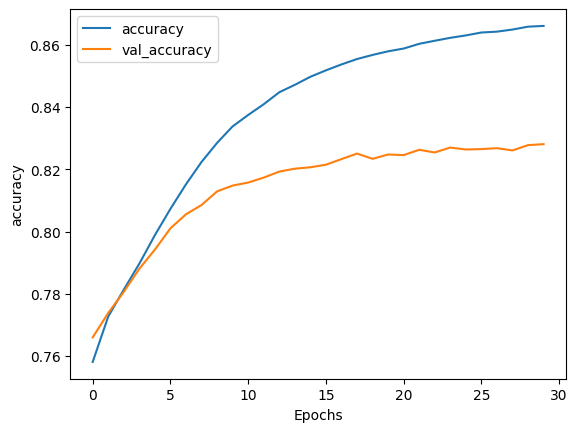

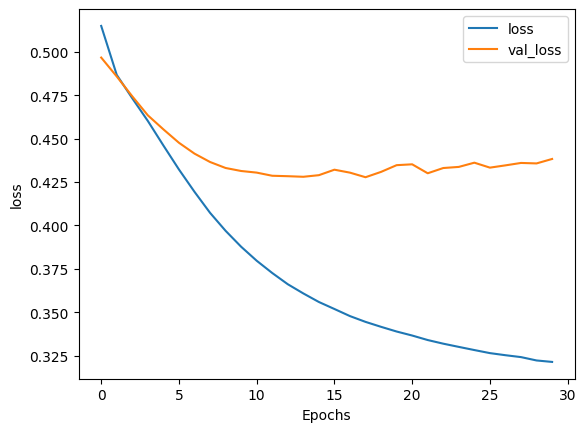

In [92]:
# Plot the accuracy and results 
plot_graphs(gru_model_2_10, "accuracy")
plot_graphs(gru_model_2_10, "loss")

Comment: This model gru_model_2_10 has high training accuracy of 86.6% and validation accuracy of 82.8%. It can pass the validation test that no overfitting issue can be identified. The total training time is approximate 1255 seconds (around 20 mins) for 30 epochs and 128 batch size.

## GRU 2.11 model

In [93]:
# Hyperparameters
embedding_dim = 54 # each word will be represented by a dense vextor of specified size
gru_dim = 54 # num of units of GRU
dense_dim = 24 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [94]:
# Build the model
gru_model_2_11 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = "softmax")
])

# Set the training parameters
# Using categorical_crossentropy for classification of positive, netural, and negative sentiment
gru_model_2_11.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
gru_model_2_11.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 10, 54)            27000     
                                                                 
 bidirectional_19 (Bidirecti  (None, 108)              35640     
 onal)                                                           
                                                                 
 dense_38 (Dense)            (None, 24)                2616      
                                                                 
 dense_39 (Dense)            (None, 3)                 75        
                                                                 
Total params: 65,331
Trainable params: 65,331
Non-trainable params: 0
_________________________________________________________________


In [95]:
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
gru_model_2_11 = gru_model_2_11.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.5143 - accuracy: 0.7580 - val_loss: 0.4970 - val_accuracy: 0.7658
Epoch 2/30
5654/5654 [==============================] - 40s 7ms/step - loss: 0.4877 - accuracy: 0.7721 - val_loss: 0.4853 - val_accuracy: 0.7733
Epoch 3/30
5654/5654 [==============================] - 40s 7ms/step - loss: 0.4746 - accuracy: 0.7803 - val_loss: 0.4746 - val_accuracy: 0.7805
Epoch 4/30
5654/5654 [==============================] - 40s 7ms/step - loss: 0.4612 - accuracy: 0.7887 - val_loss: 0.4653 - val_accuracy: 0.7863
Epoch 5/30
5654/5654 [==============================] - 41s 7ms/step - loss: 0.4475 - accuracy: 0.7972 - val_loss: 0.4579 - val_accuracy: 0.7919
Epoch 6/30
5654/5654 [==============================] - 40s 7ms/step - loss: 0.4340 - accuracy: 0.8052 - val_loss: 0.4511 - val_accuracy: 0.7972
Epoch 7/30
5654/5654 [==============================] - 41s 7ms/step - loss: 0.4216 - accuracy: 0.8130 - val_loss: 0.4482 - val_ac

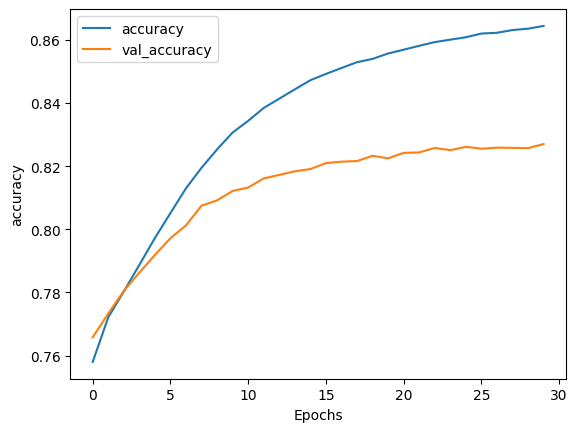

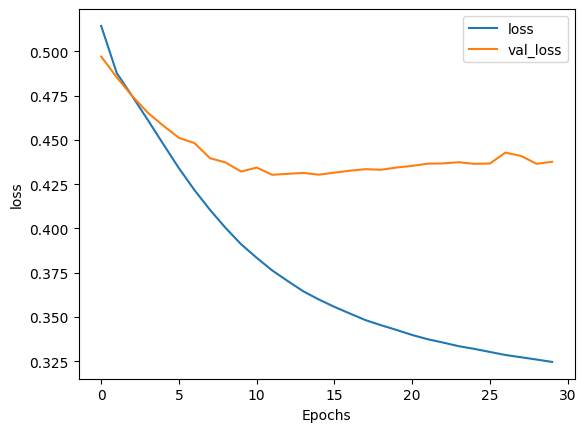

In [96]:
# Plot the accuracy and results 
plot_graphs(gru_model_2_11, "accuracy")
plot_graphs(gru_model_2_11, "loss")

Comment: This model gru_model_2_11 has high training accuracy of 86.4% and validation accuracy of 82.7%. It can pass the validation test that no overfitting issue can be identified. The total training time is approximate 1223 seconds (around 20 mins) for 30 epochs and 128 batch size.

Overall, gru_model_2 is still the best and fast model.